In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
houses = pd.read_csv('housing_clean.csv')

id 
date
price
bedrooms
bathrooms
sqft_living - area del living room
sqft_lot - area de todo
floors
waterfront - vista al mar o algun lago
view - calificacion por como se ve (0-4)?
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode 
lat
long
sqft_living
sqft_lot

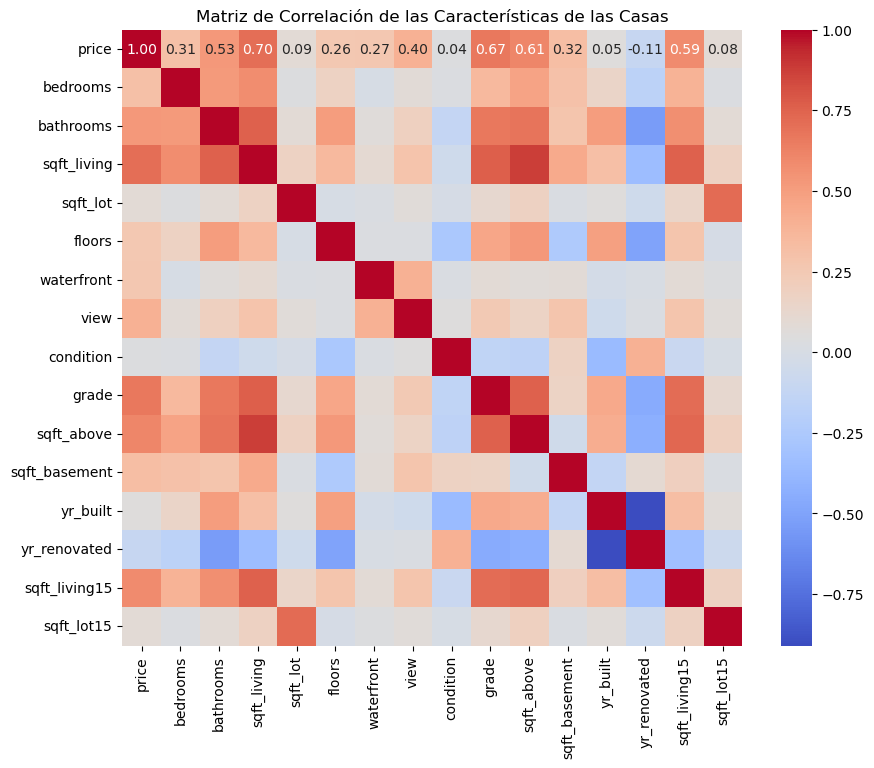

In [3]:
# Eliminar las columnas no numéricas o convertirlas a numéricas si es posible
houses_numeric = houses.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = houses_numeric.corr()

# Generar el heatmap utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Características de las Casas')
plt.show()



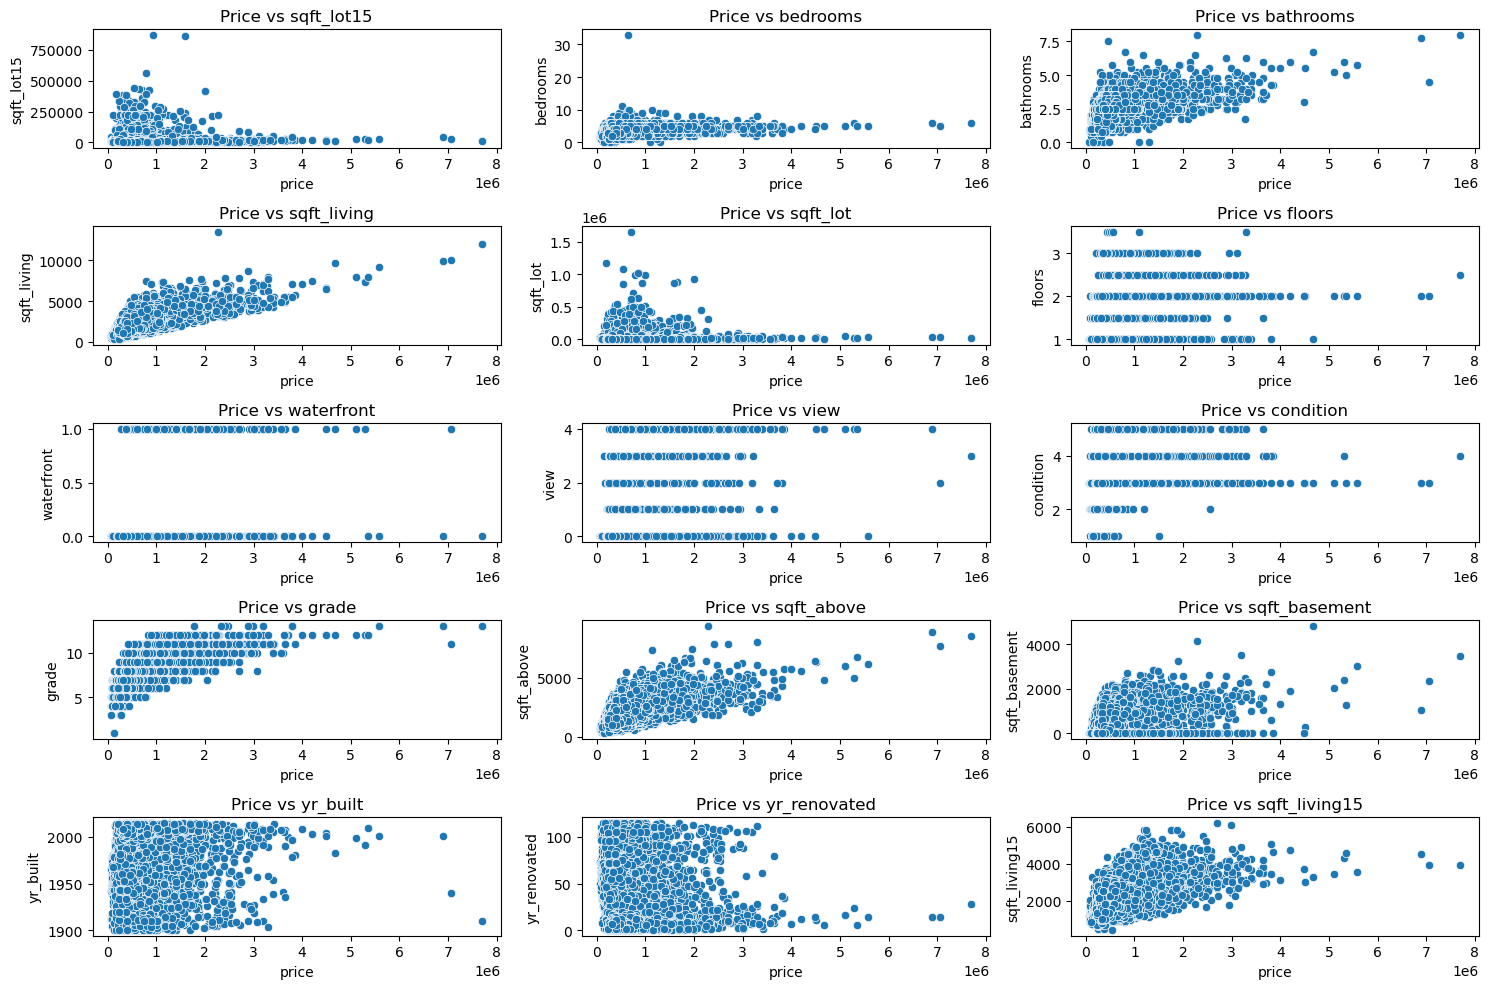

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamaño del gráfico
plt.figure(figsize=(15, 10))

# Iterar sobre las columnas y hacer un gráfico de dispersión para cada una
columns = houses.columns
num_plots = len(columns) - 1  # Excluyendo la columna 'price'
num_cols = 3  # Número de columnas en el diseño del subplot
num_rows = -(-num_plots // num_cols)  # División redondeada hacia arriba

for i, column in enumerate(columns):
    if column != 'price':  # Evitar graficar la variable "price" contra sí misma
        plt.subplot(num_rows, num_cols, i % num_plots + 1)
        sns.scatterplot(x='price', y=column, data=houses)
        plt.title('Price vs ' + column)

# Ajustar la disposición de los subgráficos
plt.tight_layout()
plt.show()


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')
[1, 2, 3]


In [8]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#X = houses[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
X = houses[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15']]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2325.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:35:10   Log-Likelihood:            -2.3665e+05
No. Observations:               17290   AIC:                         4.733e+05
Df Residuals:                   17275   BIC:                         4.734e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.734e+06   2.71e+05     24.819

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 52306785295.91382
Coeficiente de Determinación R^2: 0.6540023624336926


In [10]:
residue = model.resid
residue_mean = np.mean(residue)
residue_sum = np.sum(residue)

print(f"Media de los residuos: {residue_mean}")

if np.isclose(residue_mean, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {residue_sum}")

if np.isclose(residue_sum, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")

Media de los residuos: 2.3380726653416768e-07
La media de los residuos no es cero.
Suma de los residuos: 0.004042527638375759
La suma de los residuos no es cero.


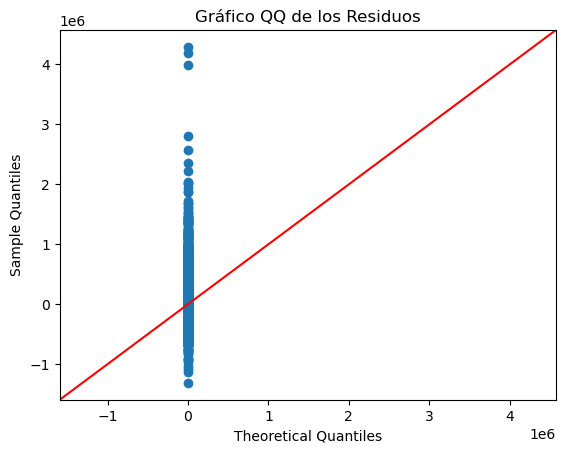

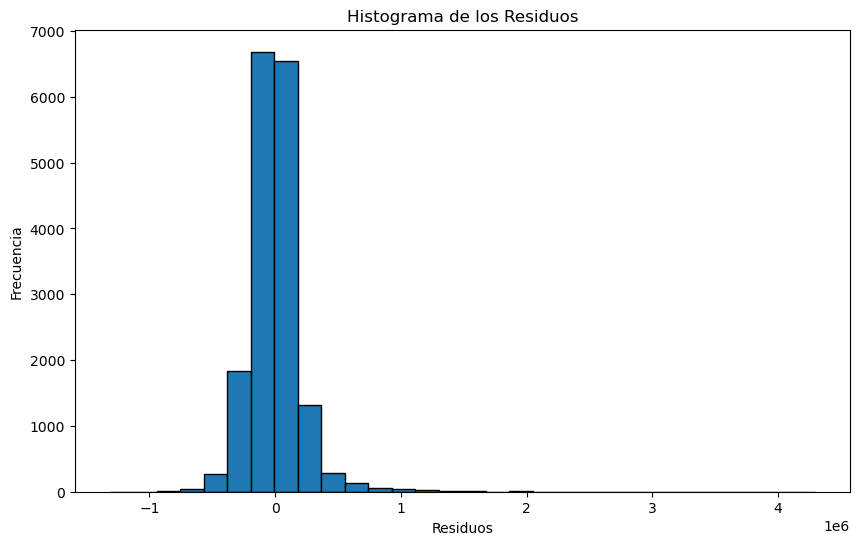

D = 0.5275303643724696, p-value = 0.0
Los residuos no parecen estar normalmente distribuidos.


In [11]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residue, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residue, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residue, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

In [12]:
from statsmodels.stats.stattools import durbin_watson

# Realizar el test de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación de la estadística de Durbin-Watson
if 1.5 < dw_stat < 2.5:
    print("No hay autocorrelación en los residuos.")
elif dw_stat < 1.5:
    print("Hay autocorrelación positiva en los residuos.")
else:
    print("Hay autocorrelación negativa en los residuos.")

Estadística de Durbin-Watson: 2.0049925808003213
No hay autocorrelación en los residuos.


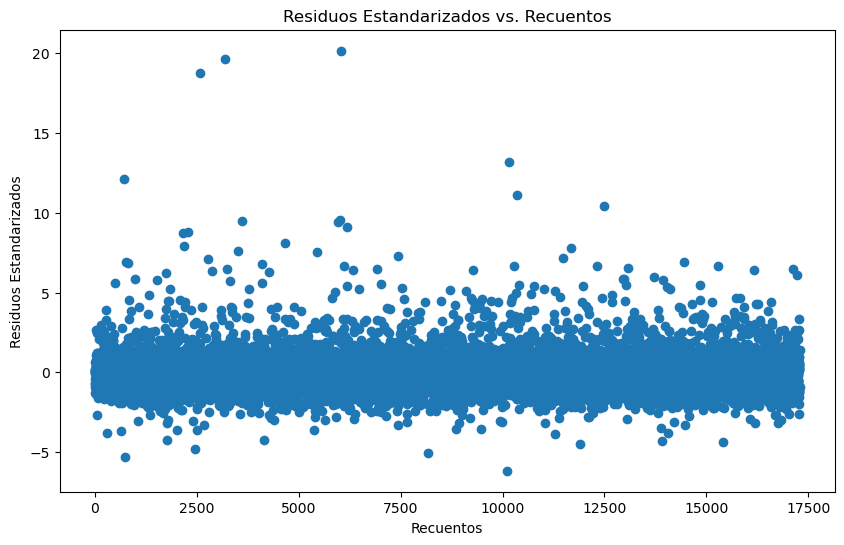

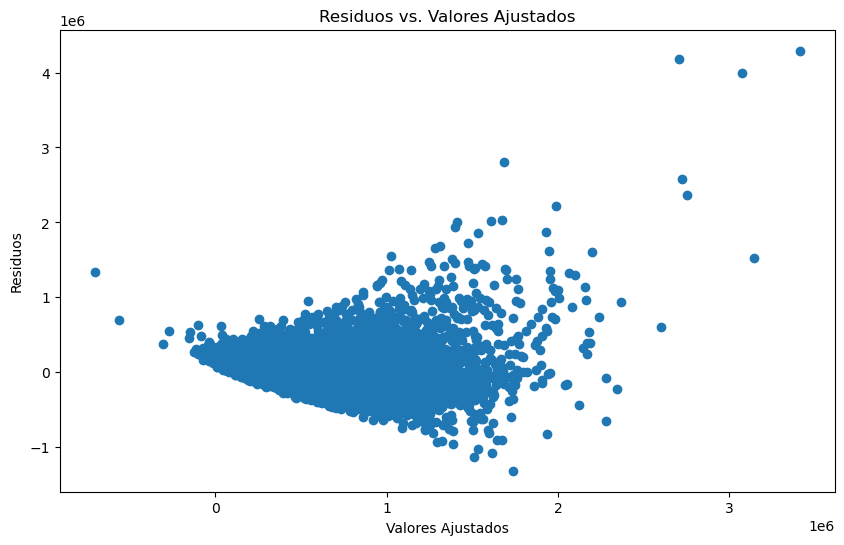

[('Lagrange multiplier statistic', 2161.917869155962), ('p-value', 0.0), ('f-value', 176.3377673892018), ('f p-value', 0.0)]


In [14]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residue / np.std(residue)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residue)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))